<a href="https://colab.research.google.com/github/DasoTD/Fraud-Detection-ML/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
print("Fraud Detection ML algo")

Fraud Detection ML algo


This project requires Python 3.7 or above:

In [6]:
import sys

assert sys.version_info >= (3, 7)



It also requires Scikit-Learn ≥ 1.0.1:

In [7]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [21]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def load_fraud_data():
    tarball_path = Path("datasets/FraudDetectionDataset.csv")
    return pd.read_csv(Path("datasets/FraudDetectionDataset.csv"))

fraud = load_fraud_data()

In [14]:
fraud.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


In [15]:
fraud.tail()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
50995,T33982,2339,3112.51,Bill Payment,15.0,Mobile,New York,0,7,8,Debit Card,0
50996,T31261,2152,2897.15,Online Purchase,3.0,Mobile,Miami,1,75,11,Net Banking,1
50997,T12293,3345,2204.43,POS Payment,18.0,Mobile,San Francisco,3,73,5,Credit Card,0
50998,T42287,1518,4787.17,POS Payment,19.0,Tablet,New York,2,108,14,Net Banking,0
50999,T13665,2315,814.72,POS Payment,3.0,Tablet,Los Angeles,0,50,10,Invalid Method,0


In [16]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [18]:
fraud.shape

(51000, 12)

In [19]:
fraud.isnull().sum()

,0
Transaction_ID,0
User_ID,0
Transaction_Amount,2520
Transaction_Type,0
Time_of_Transaction,2552
Device_Used,2473
Location,2547
Previous_Fraudulent_Transactions,0
Account_Age,0
Number_of_Transactions_Last_24H,0


In [20]:
for col in fraud.columns:
    print(f"Unique Data Of The {col}:", fraud[col].unique())

Unique Data Of The Transaction_ID: ['T1' 'T2' 'T3' ... 'T49998' 'T49999' 'T50000']
Unique Data Of The User_ID: [4174 4507 1860 ... 4616 2261 4210]
Unique Data Of The Transaction_Amount: [1292.76 1554.58 2395.02 ...  647.11 2446.65 2867.43]
Unique Data Of The Transaction_Type: ['ATM Withdrawal' 'Bill Payment' 'POS Payment' 'Bank Transfer'
 'Online Purchase']
Unique Data Of The Time_of_Transaction: [16. 13. nan 15. 19.  2.  3. 20.  0. 12. 21. 14.  7.  4. 17. 10.  5.  8.
 11. 18.  1. 22.  9.  6. 23.]
Unique Data Of The Device_Used: ['Tablet' 'Mobile' 'Desktop' nan 'Unknown Device']
Unique Data Of The Location: ['San Francisco' 'New York' nan 'Chicago' 'Boston' 'Houston' 'Miami'
 'Los Angeles' 'Seattle']
Unique Data Of The Previous_Fraudulent_Transactions: [0 4 3 2 1]
Unique Data Of The Account_Age: [119  79 115   3  57  96   6  13 110  66   4  68  25 113  52  65  21  61
  22  43   7 103   8  71  63  99  81  82   2  85  14  31 108 116  15  51
  46  94  93  70  10   1  58 112  41  27  19  3

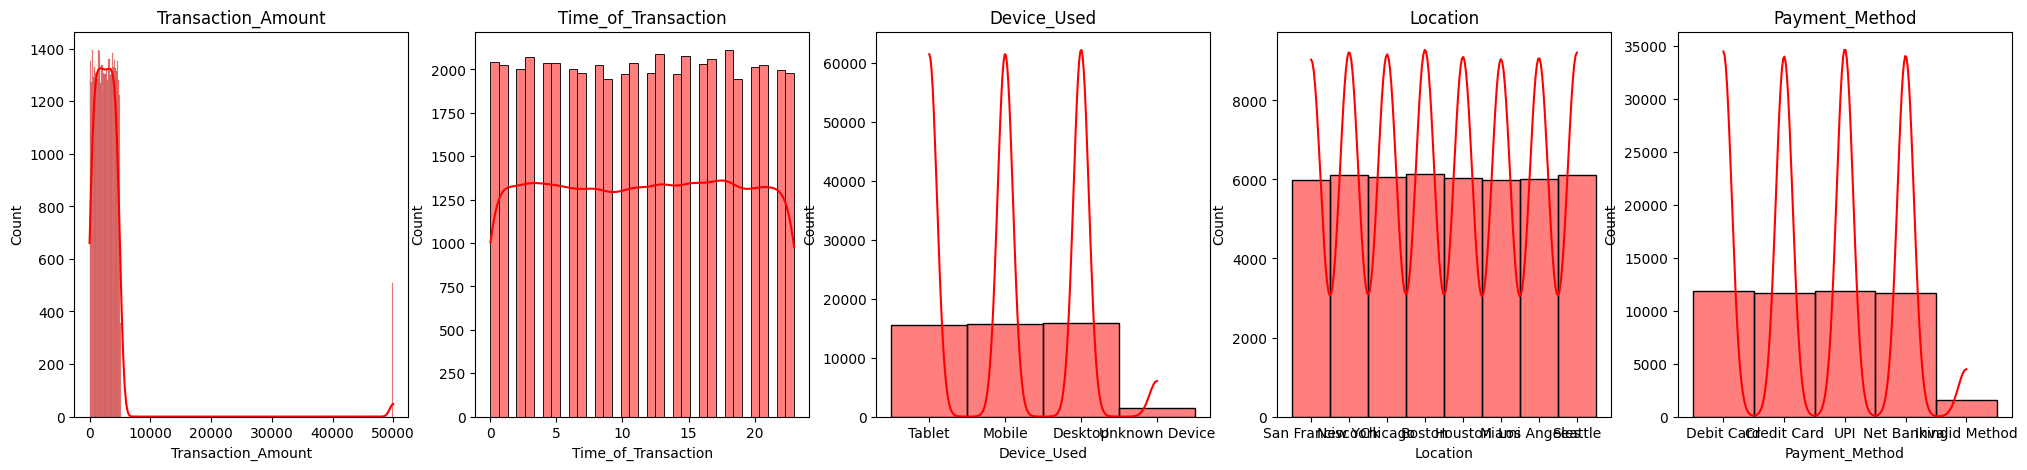

<Figure size 1000x1000 with 0 Axes>

In [23]:


missing_cols = [col for col in fraud.columns if fraud[col].isnull().sum() > 0]

fig, axes = plt.subplots(1, len(missing_cols), figsize=(5 * len(missing_cols), 5))

if len(missing_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, missing_cols):
    sns.histplot(fraud[col], kde=True, ax=ax, color='red')
    ax.set_title(col)

plt.figure(figsize=(10, 10))
plt.tight_layout()
plt.show()





Handling missing values with some random constant string is best in this situation, because only columns which contain numerical features are Transaction_Amount and Time_of_Transaction. So we will handle the categorical featured columns by replacing Nan with constant string, and numerical by replacing mean


In [24]:


for col in fraud.columns:
    if fraud[col].dtype == 'object':
        fraud[col] = fraud[col].fillna('Unknown')
    else:
        fraud[col] = fraud[col].fillna(fraud[col].mean())



Now let's visualize and confirm that all columns has been filled

In [25]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                51000 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               51000 non-null  float64
 5   Device_Used                       51000 non-null  object 
 6   Location                          51000 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    51000 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f